In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [0]:
def make_batch_of_parabola_data( batchsize ):
    
    xtrain = torch.randn(batchsize,ins)
    ytrain = 0*np.random.randint(0,2,[batchsize,1])
    ind = np.where((xtrain[:,1] - xtrain[:,0]**2) > 0)
    ytrain[ind] = 1
    ytrain = torch.from_numpy(ytrain).long()
    
    return xtrain , ytrain 

In [0]:
# MLP class
class MLP(nn.Module):
    def __init__(self,ins,outs,hidden)
        super(MLP,self).__init__()
        self.f1 = nn.Linear(ins,hidden)
        self.f2 = nn.Linear(hidden,outs)
    def forward(self,x):
        x  = F.relu( self.f1(x) )
        x  = F.log_softmax( self.f2(x), dim=1 )
        return x

File "<command-1471787027682462>" , line 3 
 def __init__(self,ins,outs,hidden) 
 ^
 SyntaxError : invalid syntax

In [0]:
# Training data
ins = 2; outs = 2; hidden = 50;
batchsize = 800;
xtrain , ytrain = make_batch_of_parabola_data( batchsize )

In [0]:
# Validation data (holdout)
validation_size = 200;
xholdout , yholdout = make_batch_of_parabola_data( validation_size )

net = MLP(ins,outs,hidden)

In [0]:
# Optimizer
criterion = nn.NLLLoss();
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.1)

In [0]:
# Training phase
epochs = 10000;
COST = []
COST_H = []
for i in range(epochs):
    optimizer.zero_grad();
    cost   = 0;
    ypred  = net(Variable(xtrain));
    ytrain = ytrain.squeeze();
    cost   = criterion(ypred,Variable(ytrain) );
    cost.backward();
    optimizer.step();
    COST.append( cost )
    
    y_hold = net( Variable( xholdout ) )
    COST_H.append( criterion( y_hold , Variable(yholdout.squeeze()) ) )
    if ( i>2 ):
        current_diff = (COST_H[-1] - COST_H[-2]).detach().numpy()
        if ( ( current_diff > 0 ) |
             ( np.abs(current_diff) < 0.01*(COST_H[1]-COST_H[0]).detach().numpy() ) ):
            break
    print("EPOCH = %d, COST = %.6f" %(i+1,cost))

EPOCH = 1, COST = 0.621885
EPOCH = 2, COST = 0.537772
EPOCH = 3, COST = 0.485320
EPOCH = 4, COST = 0.451324
EPOCH = 5, COST = 0.426412
EPOCH = 6, COST = 0.406871
EPOCH = 7, COST = 0.390962
EPOCH = 8, COST = 0.377682
EPOCH = 9, COST = 0.366379
EPOCH = 10, COST = 0.356605
EPOCH = 11, COST = 0.348042
EPOCH = 12, COST = 0.340459
EPOCH = 13, COST = 0.333673
EPOCH = 14, COST = 0.327548
EPOCH = 15, COST = 0.321974
EPOCH = 16, COST = 0.316867
EPOCH = 17, COST = 0.312159
EPOCH = 18, COST = 0.307793
EPOCH = 19, COST = 0.303727
EPOCH = 20, COST = 0.299922
EPOCH = 21, COST = 0.296347
EPOCH = 22, COST = 0.292975
EPOCH = 23, COST = 0.289784
EPOCH = 24, COST = 0.286756
EPOCH = 25, COST = 0.283874
EPOCH = 26, COST = 0.281123
EPOCH = 27, COST = 0.278492
EPOCH = 28, COST = 0.275968
EPOCH = 29, COST = 0.273542
EPOCH = 30, COST = 0.271208
EPOCH = 31, COST = 0.268959
EPOCH = 32, COST = 0.266786
EPOCH = 33, COST = 0.264682
EPOCH = 34, COST = 0.262646
EPOCH = 35, COST = 0.260669
EPOCH = 36, COST = 0.258749
EPOCH = 37, COST = 0.256879
EPOCH = 38, COST = 0.255059
EPOCH = 39, COST = 0.253287
EPOCH = 40, COST = 0.251558
EPOCH = 41, COST = 0.249869
EPOCH = 42, COST = 0.248220
EPOCH = 43, COST = 0.246605
EPOCH = 44, COST = 0.245023
EPOCH = 45, COST = 0.243472
EPOCH = 46, COST = 0.241950
EPOCH = 47, COST = 0.240455
EPOCH = 48, COST = 0.238988
EPOCH = 49, COST = 0.237545
EPOCH = 50, COST = 0.236128
EPOCH = 51, COST = 0.234733
EPOCH = 52, COST = 0.233359
EPOCH = 53, COST = 0.232006
EPOCH = 54, COST = 0.230672
EPOCH = 55, COST = 0.229357
EPOCH = 56, COST = 0.228058
EPOCH = 57, COST = 0.226776
EPOCH = 58, COST = 0.225511
EPOCH = 59, COST = 0.224262
EPOCH = 60, COST = 0.223029
EPOCH = 61, COST = 0.221811
EPOCH = 62, COST = 0.220609
EPOCH = 63, COST = 0.219422
EPOCH = 64, COST = 0.218248
EPOCH = 65, COST = 0.217089
EPOCH = 66, COST = 0.215944
EPOCH = 67, COST = 0.214814
EPOCH = 68, COST = 0.213698
EPOCH = 69, COST = 0.212594
EPOCH = 70, COST = 0.211503
EPOCH = 71, COST = 0.210424
EPOCH = 72, COST = 0.209354
EPOCH = 73, COST = 0.208293
EPOCH = 74, COST = 0.207244
EPOCH = 75, COST = 0.206205
EPOCH = 76, COST = 0.205177
EPOCH = 77, COST = 0.204159
EPOCH = 78, COST = 0.203152
EPOCH = 79, COST = 0.202155
EPOCH = 80, COST = 0.201167
EPOCH = 81, COST = 0.200188
EPOCH = 82, COST = 0.199221
EPOCH = 83, COST = 0.198263
EPOCH = 84, COST = 0.197315
EPOCH = 85, COST = 0.196375
EPOCH = 86, COST = 0.195443
EPOCH = 87, COST = 0.194521
EPOCH = 88, COST = 0.193609
EPOCH = 89, COST = 0.192706
EPOCH = 90, COST = 0.191811
EPOCH = 91, COST = 0.190923
EPOCH = 92, COST = 0.190043
EPOCH = 93, COST = 0.189173
EPOCH = 94, COST = 0.188311
EPOCH = 95, COST = 0.187458
EPOCH = 96, COST = 0.186614
EPOCH = 97, COST = 0.185777
EPOCH = 98, COST = 0.184949
EPOCH = 99, COST = 0.184127
EPOCH = 100, COST = 0.183315
EPOCH = 101, COST = 0.182510
EPOCH = 102, COST = 0.181713
EPOCH = 103, COST = 0.180924
EPOCH = 104, COST = 0.180142
EPOCH = 105, COST = 0.179367
EPOCH = 106, COST = 0.178598
EPOCH = 107, COST = 0.177837
EPOCH = 108, COST = 0.177082
EPOCH = 109, COST = 0.176334
EPOCH = 110, COST = 0.175592
EPOCH = 111, COST = 0.174857
EPOCH = 112, COST = 0.174129
EPOCH = 113, COST = 0.173408
EPOCH = 114, COST = 0.172693
EPOCH = 115, COST = 0.171984
EPOCH = 116, COST = 0.171282
EPOCH = 117, COST = 0.170586
EPOCH = 118, COST = 0.169895
EPOCH = 119, COST = 0.169210
EPOCH = 120, COST = 0.168531
EPOCH = 121, COST = 0.167858
EPOCH = 122, COST = 0.167191
EPOCH = 123, COST = 0.166531
EPOCH = 124, COST = 0.165877
EPOCH = 125, COST = 0.165229
EPOCH = 126, COST = 0.164587
EPOCH = 127, COST = 0.163951
EPOCH = 128, COST = 0.163322
EPOCH = 129, COST = 0.162699
EPOCH = 130, COST = 0.162082
EPOCH = 131, COST = 0.161471
EPOCH = 132, COST = 0.160866
EPOCH = 133, COST = 0.160267
EPOCH = 134, COST = 0.159673
EPOCH = 135, COST = 0.159085
EPOCH = 136, COST = 0.158501
EPOCH = 137, COST = 0.157923
EPOCH = 138, COST = 0.157350
EPOCH = 139, COST = 0.156781
EPOCH = 140, COST = 0.156217
EPOCH = 141, COST = 0.155658
EPOCH = 142, COST =

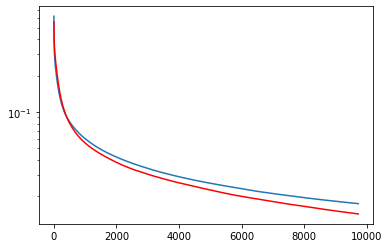

In [0]:
# Results
plt.semilogy( COST )
plt.semilogy( COST_H , 'r' )
plt.figure()

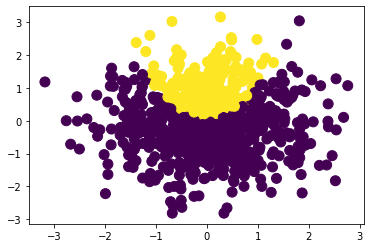

In [0]:
plt.scatter(np.ravel(xtrain[:,0]),np.ravel(xtrain[:,1]),s=100,c=np.ravel(ytrain))
plt.figure()

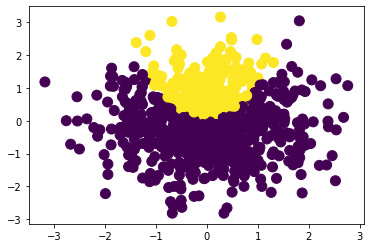

In [0]:
plt.scatter(np.ravel(xtrain[:,0]),np.ravel(xtrain[:,1]),s=100,c=ypred.max(dim=1)[1])
plt.show()